Zuxuan Huai

Github Repo: https://github.com/wendyhuai/Online-Shoppers-Analysis

# Introduction

Over the last few years, e-commerce has become an indispensable part of the global retail framework. As more people choose to shop online, how and why, when and what makes a customer click on the "purchase" button is the question that many online retailers seek to answer.   

This projects analyzes the online shoppers purchasing intention dataset from UCI Machine Learning Repository, and investigates what factors will classify a website visit as a visit with purchase made or without. 

This dataset contains 12330 rows and 18 columns. The target variable is the last column of the dataset, which is the revenue column with boolean values true or flase. A true means the user made a purchase in this visit, and a false means the user did not make a purchase. The goal of project is to classify whether a user made a purchase or not given his/her information.  

The predictor variables are the first 17 columns (10 numerical and 7 categorical). 
- Administrative, Informational, ProductRelated: the number of different types of pages visited by the visitor in that session
- Administrative_Duration, Informational_Duration, ProductRelated_Duration: total time spent in each of these page categories
- BounceRates: the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- ExitRates: for all pageviews to the page, the percentage that were the last in the session
- PageValues: the average value for a web page that a user visited before completing an e-commerce transaction
- SpecialDay: numerical [0, 0.2, 0.4, 0.6, 0.8, 1] closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) 
- Month: 10 unique months, excluding Jan and Apr
- OperatingSystems: 8 categories
- Browser: 13 categories
- Region: 9 categories
- TrafficType: 20 categories
- VisitorType: indicates a user is a returning visitor, new visitor, or other
- Weekend: (Ture/False) whether the visit date is a weekend

A real-time online shopper behavior nalysis system has been built using this dataset. The researchers has successfully predicted the urchasing intention using clickstream and session information data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/online_shoppers_intention.csv")

# EDA

#### Target Variable Analysis

The target variable has 10422 falses and 1908 trues. The bar plot below visualizes the breakdown of the target variable.

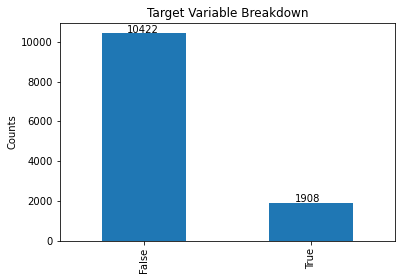

In [11]:
pd.value_counts(df['Revenue']).plot.bar()
val = pd.value_counts(df['Revenue'])
for i, v in enumerate(val):
    plt.text(i -0.1, v + 25, str(v))
plt.title("Target Variable Breakdown")
plt.ylabel('Counts')
plt.savefig('../figure/y_bar.png',dpi = 300)
plt.show()

## Predictor Variables - Numerical Variables

The first 6 columns includes information about number of visits in a certain type of page and the total time spent on this type of page. The types include administrative, informational, and product-related. It is worth noticing that the number of product-related page visits shows a positive correlation with the time spent on product-related pages. A scatter plot of these two variables are shown below. 

In [13]:
# plt.scatter(df.iloc[:,0], df.iloc[:,1])
# plt.xlabel("Number of Administrative Page Visits")
# plt.ylabel("Total Time Spent")
# plt.savefig('../figure/admin_scatter',dpi = 300)
# plt.title("Administrative Page Info")

In [16]:
# plt.scatter(df.iloc[:,2], df.iloc[:,3])
# plt.xlabel("Number of Informational Page Visits")
# plt.ylabel("Total Time Spent")
# plt.savefig('../figure/Info_scatter.png',dpi = 300)
# plt.title("Informational Page Info")

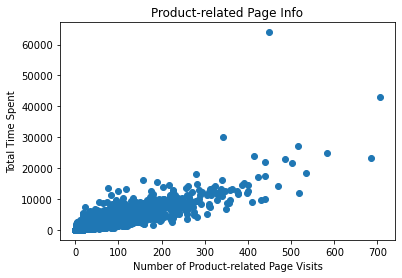

In [17]:
plt.scatter(df.iloc[:,4], df.iloc[:,5])
plt.xlabel("Number of Product-related Page Visits")
plt.ylabel("Total Time Spent")
plt.title("Product-related Page Info")
plt.savefig('../figure/prod_scatter.png',dpi = 300)
plt.show()

The next 4 columns are numerical variables as well. After looking at the brief statistics of these columns below, I noticed that the majority of Page Values and Special Days are zero.

In [30]:
df[col_names].describe()

,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.022191,0.043073,5.889258,0.061427
std,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.014286,0.000000,0.000000
50%,0.003112,0.025156,0.000000,0.000000
75%,0.016813,0.050000,0.000000,0.000000
max,0.200000,0.200000,361.763742,1.000000


In [19]:
# print(df[df['BounceRates']==0].shape[0]/df.shape[0])
# df[df['BounceRates']>0]['BounceRates'].plot.hist(bins = int(np.sqrt(df.shape[0])))   
# plt.title("Histogram of Bounce Rates")
# plt.xlabel('Bounce Rates')
# plt.savefig('../figure/BounceRate_hist.png',dpi = 300)
# plt.show()

In [21]:
# df['ExitRates'].plot.hist(bins = int(np.sqrt(df.shape[0])))   
# plt.title("Histogram of Exit Rates")
# plt.xlabel('Exit Rates')
# plt.savefig('../figure/ExitRate_hist.png',dpi = 300)
# plt.show()

0.7785888077858881


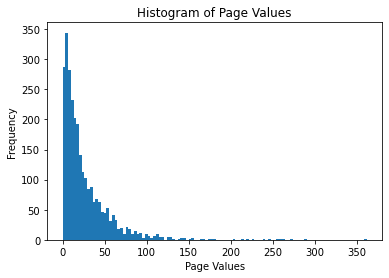

In [22]:
print(df[df['PageValues']==0].shape[0]/df.shape[0])
df[df['PageValues']>0]['PageValues'].plot.hist(bins = int(np.sqrt(df.shape[0])))   
plt.title("Histogram of Page Values")
plt.xlabel('Page Values')
plt.savefig('../figure/PageVal_hist.png',dpi = 300)
plt.show()

Since 77.9% of this data is zero, a histogram excluding the zeros gives an over view of the distribution of the remaining data.

Since The special day measures the closesness of the purchase date to a special date, I will treat this variable as ordinal variable in future analysis.

In [62]:
df['SpecialDay'].value_counts().sort_index()

0.0    11079
0.2      178
0.4      243
0.6      351
0.8      325
1.0      154
Name: SpecialDay, dtype: int64

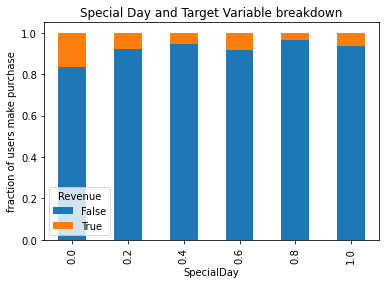

In [24]:
count_matrix = df.groupby(['SpecialDay', 'Revenue']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of users make purchase')
plt.title('Special Day and Target Variable breakdown')
plt.savefig('../figure/SD_bar.png',dpi = 300)
plt.show()

This figures shows the fraction of users make purchases with the corresponding special date variable.It is interesting to see that fewer people make purchaes at 0.4 and 0.8 compare to other special day numbers.

## Predictor Variables - Categorical Variables

There are many categorical variables in this dataset, here is the breakdown of month and purchases.

In [66]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

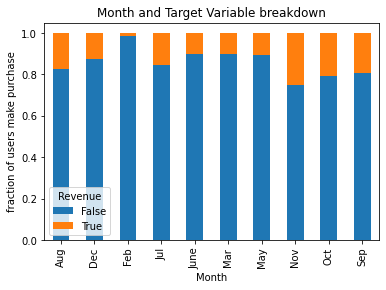

In [68]:
count_matrix = df.groupby(['Month', 'Revenue']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of users make purchase')
plt.title( 'Month and Target Variable breakdown')
plt.show()

This figure shows the fraction of purchases make in each month. January and April is not present in the dataset. A small fraction of users make purchases in Feb and a relatively large proportion of users make purchases in their visits in Novernmber.  

In [69]:
# names = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
# for name in names:
#     count_matrix = df.groupby([name, 'Revenue']).size().unstack()
#     count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#     count_matrix_norm.plot(kind='bar', stacked=True)
#     plt.ylabel('fraction of users make purchase')
#     plt.title(name + ' and Target Variable breakdown')
#     plt.savefig('../figure/'+name+'_bar.png',dpi = 300)
#     plt.show()

# Data Preprocessing

Since each rows represents a unique visit from an anonymous users, this dataset is iid. Hence, it does not have a group structure, and it is not a time series data.
Because only a small portion of the dataset has true in the revenue column, I will perform a Stratified K-Fold data split to ensure there are similar fraction of trues in target variable in the training, validation, and testing dataset. I will use the standard 60%, 20%, 20% data split.

In [85]:
y = df['Revenue'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'Revenue']

In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
random_state = 10
    
# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',y_test.value_counts(normalize=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('train balance:')
    print(y_train.value_counts(normalize=True))
    print('val balance:')
    print(y_val.value_counts(normalize=True))

test balance: False    0.845093
True     0.154907
Name: Revenue, dtype: float64
train balance:
False    0.845228
True     0.154772
Name: Revenue, dtype: float64
val balance:
False    0.845499
True     0.154501
Name: Revenue, dtype: float64
train balance:
False    0.845228
True     0.154772
Name: Revenue, dtype: float64
val balance:
False    0.845499
True     0.154501
Name: Revenue, dtype: float64
train balance:
False    0.845364
True     0.154636
Name: Revenue, dtype: float64
val balance:
False    0.845093
True     0.154907
Name: Revenue, dtype: float64
train balance:
False    0.845364
True     0.154636
Name: Revenue, dtype: float64
val balance:
False    0.845093
True     0.154907
Name: Revenue, dtype: float64


From exploratory analysis, I find many numerical variables are heavily tailed or has a few extremely large values, so I will use Standard Scaler to transform the continuous variables. The SpecialDate variable although it is numerical, it represents the closeness of the purchase date to the special date, I will treat it as a categorical feature and use Ordinal Encoder to transform. I will transform the remaining categorical features using OneHotEncoder. The target variables are true and false, which does not need any transformation.

There are 17 features in the processed dataset. After preprocessing, the 17 predictor columns has expanded to 74 columns. 

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [102]:
ordinal_ftrs = ['SpecialDay'] 
ordinal_cats = [[0. , 0.2, 0.4, 0.6, 0.8, 1.]]
onehot_ftrs = ['Month',  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',  'Weekend']
#minmax_ftrs = ['age','hours-per-week']
std_ftrs = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)



(7398, 17)
(7398, 74)


# Reference

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).